# Ciencia dos dados Projeto 3

In [21]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
#importando o K Means para fazer o cluster
from sklearn.cluster import KMeans

In [8]:
df = pd.read_csv('Tabela_minimizada.csv',sep=',')
df.head()

,Count,Name,Price,Rating,Review,Quantity,Brand,Brand_Number
0,0,"6"" Inch Unlocked Android 4.4.2 MTK6572 Dual Co...",100.0,1,I purchased this phone and didn't work,108,Samsung,8
1,1,"6"" Inch Unlocked Android 4.4.2 MTK6572 Dual Co...",100.0,1,"This item is terrible, the worst thing I ever ...",108,Samsung,8
2,2,"6"" Inch Unlocked Android 4.4.2 MTK6572 Dual Co...",100.0,1,"The phone worked very good the first month, th...",108,Samsung,8
3,3,"6"" Inch Unlocked Android 4.4.2 MTK6572 Dual Co...",100.0,5,im loven it,108,Samsung,8
4,4,"6"" Inch Unlocked Android 4.4.2 MTK6572 Dual Co...",100.0,1,only 1 star because this phone looks good it s...,108,Samsung,8


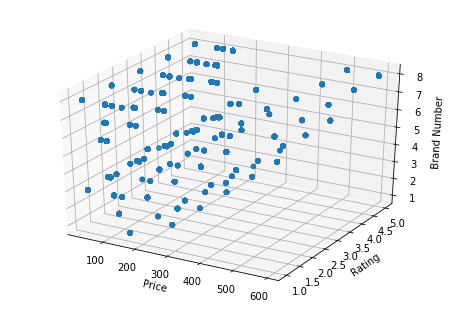

In [17]:
#Criando o gráfico 3D
fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(df.Price, df.Rating, df.Brand_Number)

ax.set_xlabel('Price')
ax.set_ylabel('Rating')
ax.set_zlabel('Brand Number')

pyplot.show()

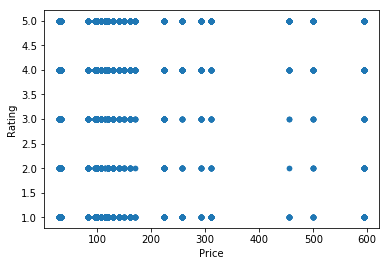

In [23]:
df.plot.scatter(x = 'Price', y = 'Rating')